In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Enable inline plotting for Google Colab
%matplotlib inline

In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files

# Step 1: Upload the dataset
print("Please upload your dataset.")
uploaded = files.upload()

# Step 2: Load the dataset into a DataFrame
try:
    # Get the file name from the uploaded dictionary
    file_name = list(uploaded.keys())[0]
    # Load the dataset (try multiple encodings if needed)
    df = pd.read_csv(file_name, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_name, encoding='latin1')

# Step 3: Display basic dataset information
print("\nDataset successfully loaded! Here are the first 5 rows:")
print(df.head())
print("\nDataset information:")
print(df.info())

# Step 4: Handle null values
print("\nChecking for missing values...")
missing_values = df.isnull().sum()
print("Missing values before cleaning:\n", missing_values)

# Fill missing values with appropriate replacements
for column in df.columns:
    if df[column].dtype == 'object':  # For categorical columns
        df[column].fillna('Unknown', inplace=True)
    else:  # For numeric columns
        df[column].fillna(0, inplace=True)

# Verify no missing values remain
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Step 5: Drop duplicates
df.drop_duplicates(inplace=True)

# Display the cleaned dataset
print("\nCleaned dataset information:")
print(df.info())

# Optional: Save the cleaned dataset back to a file
df.to_csv("Cleaned_DataCoSupplyChainDataset.csv", index=False)
print("\nCleaned dataset saved as 'Cleaned_DataCoSupplyChainDataset.csv'.")


Please upload your dataset.


Saving DataCoSupplyChainDataset.csv to DataCoSupplyChainDataset.csv

Dataset successfully loaded! Here are the first 5 rows:
       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...

<ipython-input-4-3c9d77a87191>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('Unknown', inplace=True)
<ipython-input-4-3c9d77a87191>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.


Missing values after cleaning:
Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id      

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Identify Features for Demand Forecasting
print("\nStep 1: Identifying relevant features...")

# Add 'Product Category Id' and 'Market' to the relevant features list
relevant_features = [
    'Order Region', 'Product Name', 'Order Item Quantity', 'Sales', 'Order Date (DateOrders)',
    'Category Name', 'Customer City', 'Customer Country', 'Customer State', 'Latitude', 'Longitude',
    'Market', 'order region', 'Order State', 'Product Category Id', 'Product Name',
    'Sales per customer', 'Benefit per order'
]

# Check if all relevant features exist in the dataset
available_features = [feature for feature in relevant_features if feature in df.columns]
print("Available features for analysis:", available_features)






Step 1: Identifying relevant features...
Available features for analysis: ['Order Region', 'Product Name', 'Order Item Quantity', 'Sales', 'Category Name', 'Customer City', 'Customer Country', 'Customer State', 'Latitude', 'Longitude', 'Market', 'Order State', 'Product Category Id', 'Product Name', 'Sales per customer', 'Benefit per order']


In [ ]:
# Ensure 'Order Date (DateOrders)' is correctly parsed as datetime
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')

# Extract Month and Year from the 'Order Date'
df['Month'] = df['order date (DateOrders)'].dt.month
df['Year'] = df['order date (DateOrders)'].dt.year

# Aggregating demand by Month, Product Category Id, Product Category Name, and Market
monthly_product_category_demand = df.groupby(['Month', 'Product Category Id', 'Product Name', 'Market'])['Order Item Quantity'].sum().reset_index()

# Aggregating demand by Year, Product Category Id, Product Category Name, and Market
yearly_product_category_demand = df.groupby(['Year', 'Product Category Id', 'Product Name', 'Market'])['Order Item Quantity'].sum().reset_index()

# Save the aggregated results as CSV files
monthly_product_category_demand.to_csv('/content/monthly_product_category_demand.csv', index=False)
yearly_product_category_demand.to_csv('/content/yearly_product_category_demand.csv', index=False)

# Provide download links for the CSV files in Colab
from google.colab import files
files.download('/content/monthly_product_category_demand.csv')
files.download('/content/yearly_product_category_demand.csv')

# Output the results
print("Monthly Product Category Demand:")
print(monthly_product_category_demand.head())  # Display the first few rows of monthly demand

print("\nYearly Product Category Demand:")
print(yearly_product_category_demand.head())  # Display the first few rows of yearly demand


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Monthly Product Category Demand:
   Month  Product Category Id                                Product Name  \
0      1                    3       adidas Kids' F5 Messi FG Soccer Cleat   
1      1                    3       adidas Kids' F5 Messi FG Soccer Cleat   
2      1                    3       adidas Kids' F5 Messi FG Soccer Cleat   
3      1                    3  adidas Men's F10 Messi TRX FG Soccer Cleat   
4      1                    3  adidas Men's F10 Messi TRX FG Soccer Cleat   

         Market  Order Item Quantity  
0        Africa                    5  
1         LATAM                   39  
2  Pacific Asia                   33  
3        Africa                    3  
4        Europe                    4  

Yearly Product Category Demand:
   Year  Product Category Id                                Product Name  \
0  2015                    3       adidas Kids' F5 Messi FG Soccer Cleat   
1  2015                    3       adidas Kids' F5 Messi FG Soccer Cleat   
2  2015  

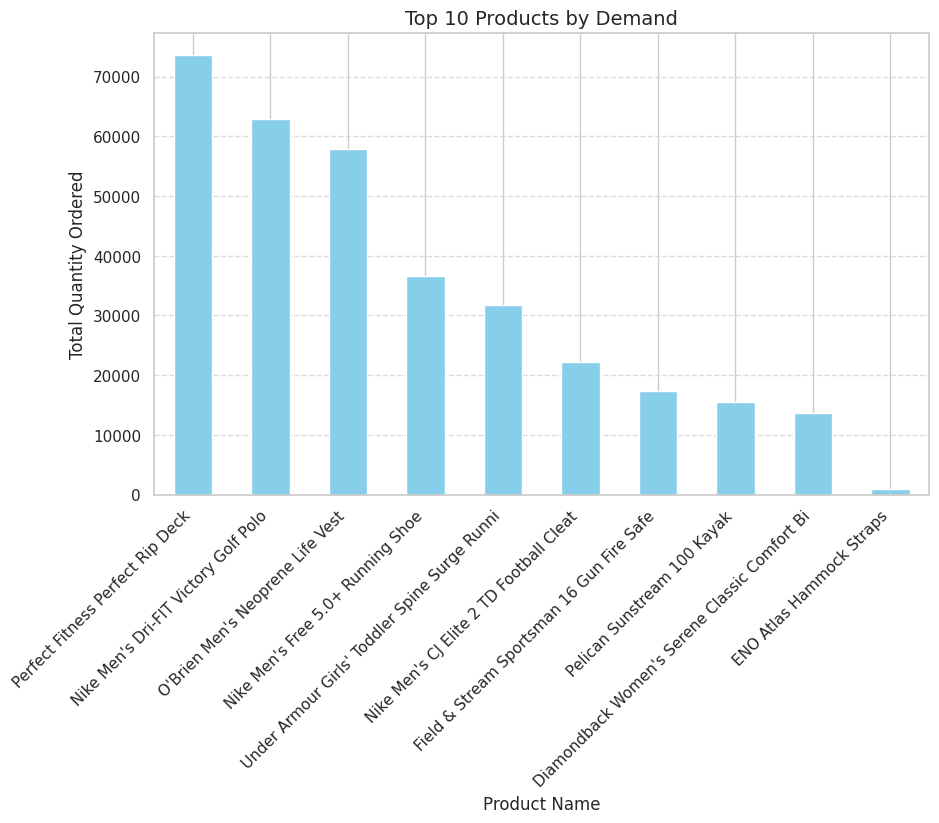

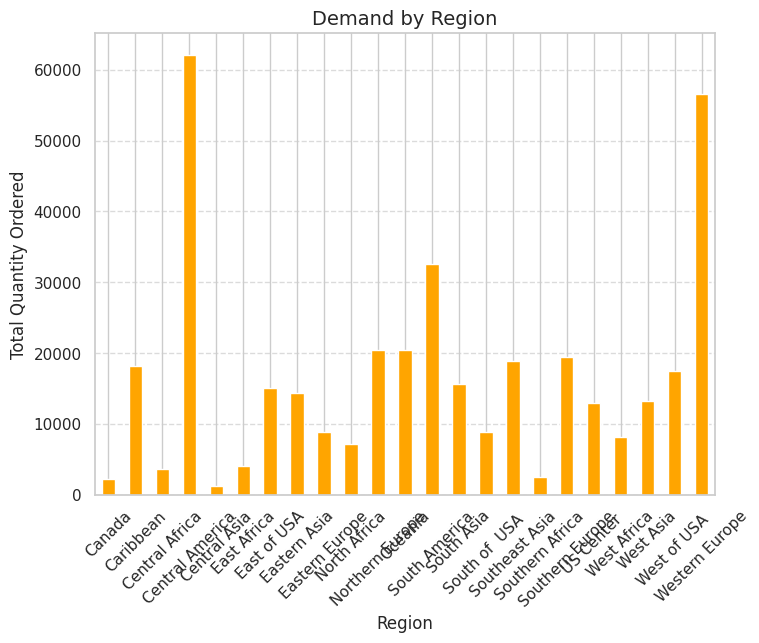

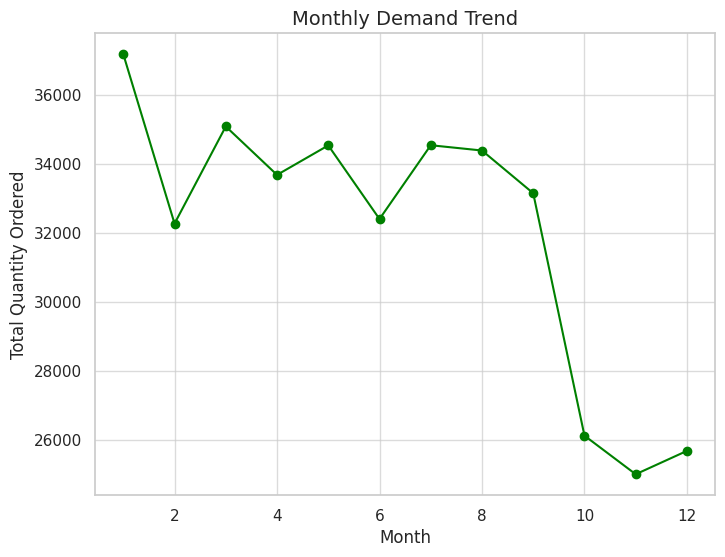

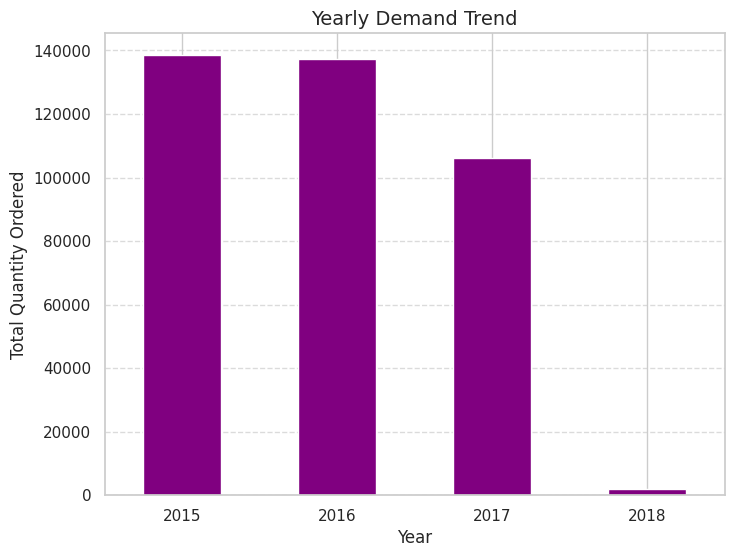


Step 5: Saving aggregated data for Tableau...
Aggregated data saved as CSV files.


In [ ]:
import matplotlib.pyplot as plt

# Step 4: Visualize Trends

# Product-wise demand visualization
product_demand = df.groupby('Product Name')['Order Item Quantity'].sum().sort_values(ascending=False)  # Aggregating product-wise demand
plt.figure(figsize=(10, 6))
product_demand.head(10).plot(kind='bar', color='skyblue')  # Plotting top 10 products
plt.title("Top 10 Products by Demand", fontsize=14)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Quantity Ordered", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Region-wise demand visualization
region_demand = df.groupby('Order Region')['Order Item Quantity'].sum()  # Aggregating region-wise demand
plt.figure(figsize=(8, 6))
region_demand.plot(kind='bar', color='orange')  # Plotting region-wise demand
plt.title("Demand by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Quantity Ordered", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Monthly demand trend
monthly_demand = df.groupby('Month')['Order Item Quantity'].sum()  # Aggregating monthly demand
plt.figure(figsize=(8, 6))
monthly_demand.plot(kind='line', marker='o', color='green')  # Plotting monthly demand trend
plt.title("Monthly Demand Trend", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Quantity Ordered", fontsize=12)
plt.grid(alpha=0.7)
plt.show()

# Yearly demand trend
yearly_demand = df.groupby('Year')['Order Item Quantity'].sum()  # Aggregating yearly demand
plt.figure(figsize=(8, 6))
yearly_demand.plot(kind='bar', color='purple')  # Plotting yearly demand trend
plt.title("Yearly Demand Trend", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Quantity Ordered", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 5: Save Aggregated Data for Tableau
print("\nStep 5: Saving aggregated data for Tableau...")

# Save product-wise demand
product_demand_df = product_demand.reset_index()
product_demand_df.columns = ['Product Name', 'Total Quantity Ordered']
product_demand_df.to_csv("Product_Demand.csv", index=False)

# Save region-wise demand
region_demand_df = region_demand.reset_index()
region_demand_df.columns = ['Order Region', 'Total Quantity Ordered']
region_demand_df.to_csv("Region_Demand.csv", index=False)

# Save monthly demand
monthly_demand_df = monthly_demand.reset_index()
monthly_demand_df.columns = ['Month', 'Total Quantity Ordered']
monthly_demand_df.to_csv("Monthly_Demand.csv", index=False)

# Save yearly demand
yearly_demand_df = yearly_demand.reset_index()
yearly_demand_df.columns = ['Year', 'Total Quantity Ordered']
yearly_demand_df.to_csv("Yearly_Demand.csv", index=False)

print("Aggregated data saved as CSV files.")


In [ ]:
print(df.columns)

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

<ipython-input-24-524acc00a5eb>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_products, x='Order Item Quantity', y='Product Name', palette='Greens_r')


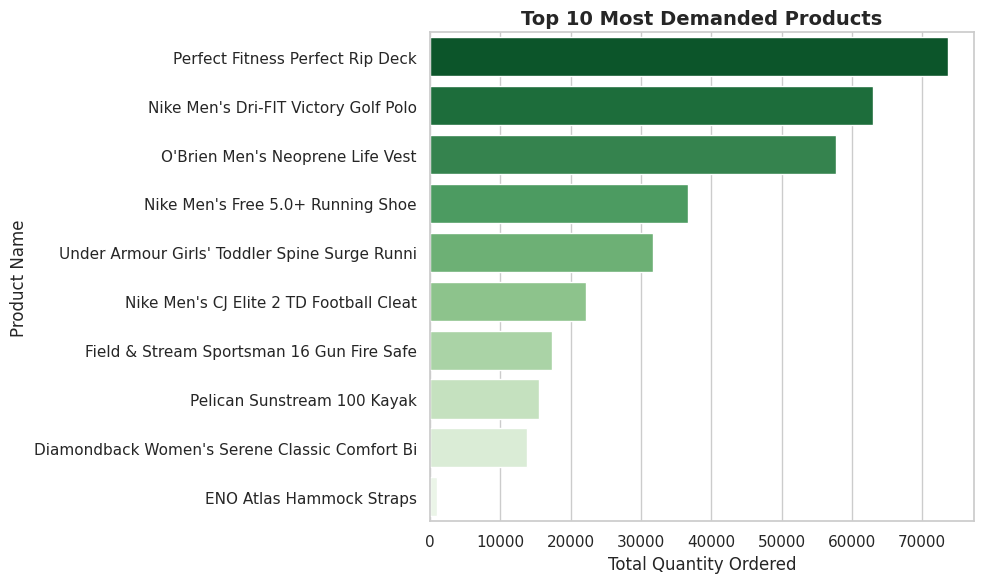

<ipython-input-24-524acc00a5eb>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=least_10_products, x='Order Item Quantity', y='Product Name', palette='Reds_r')


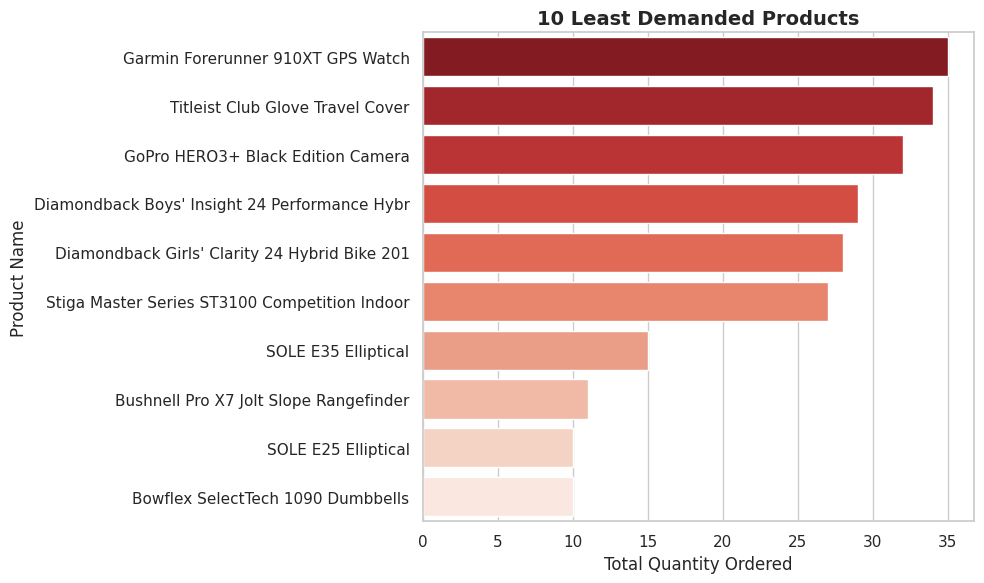

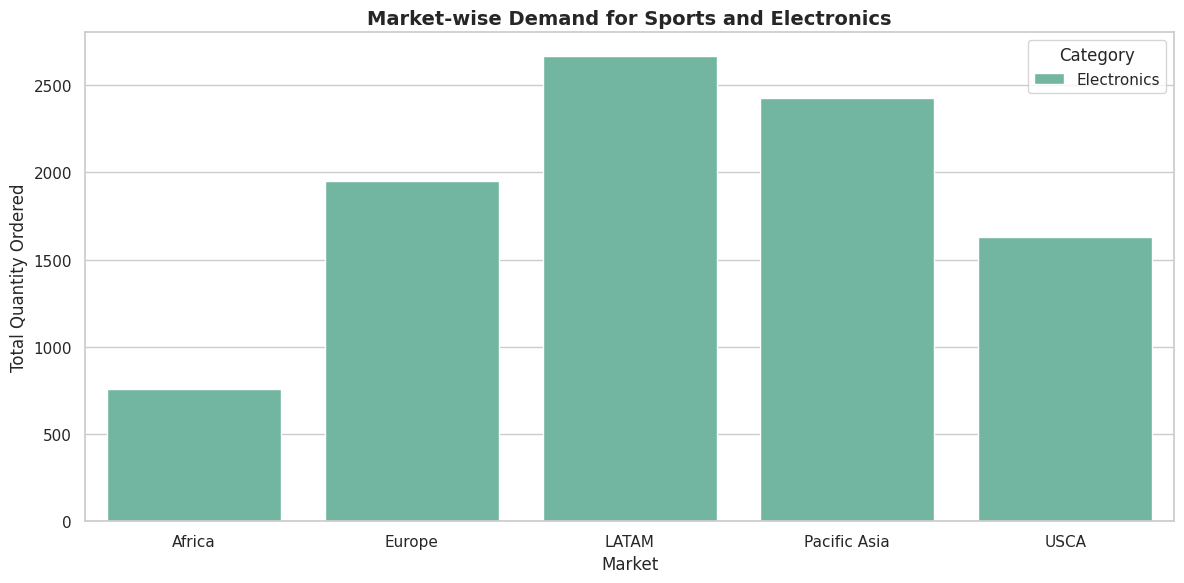

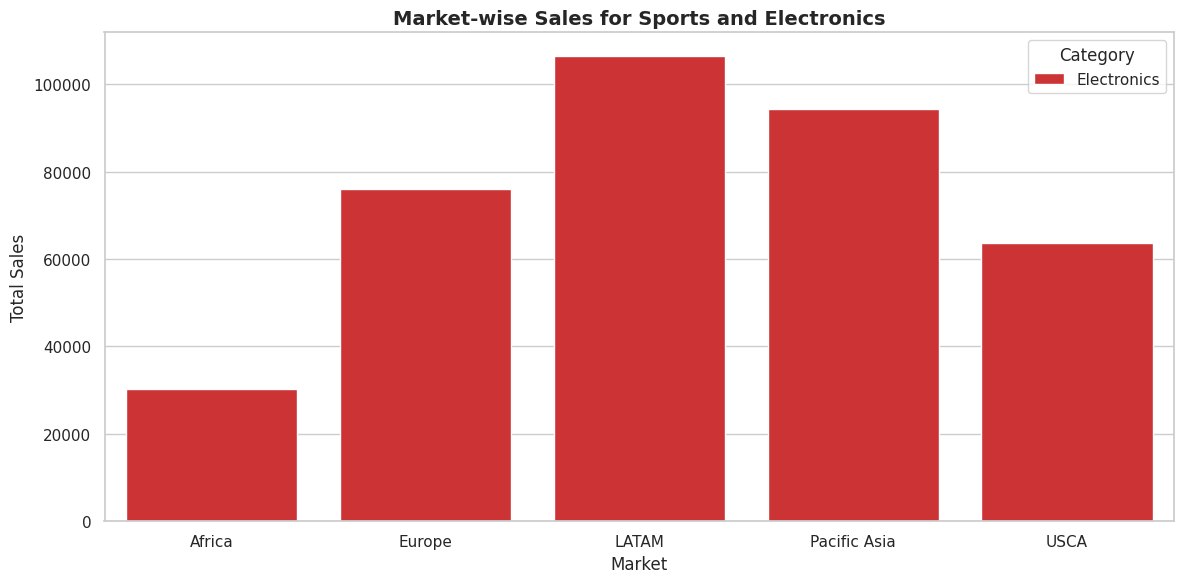

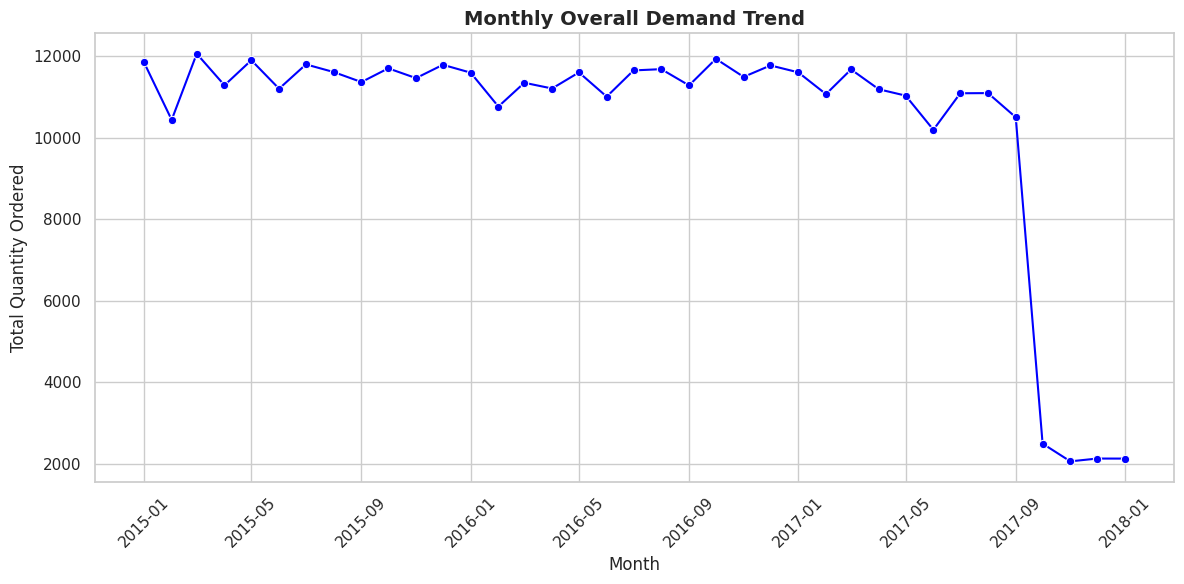

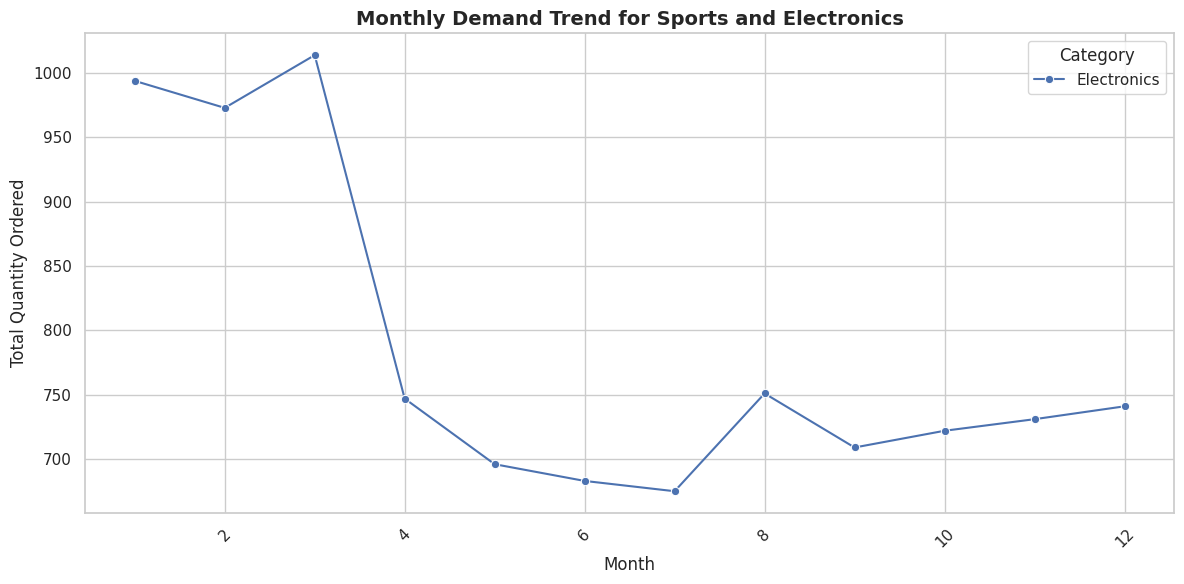

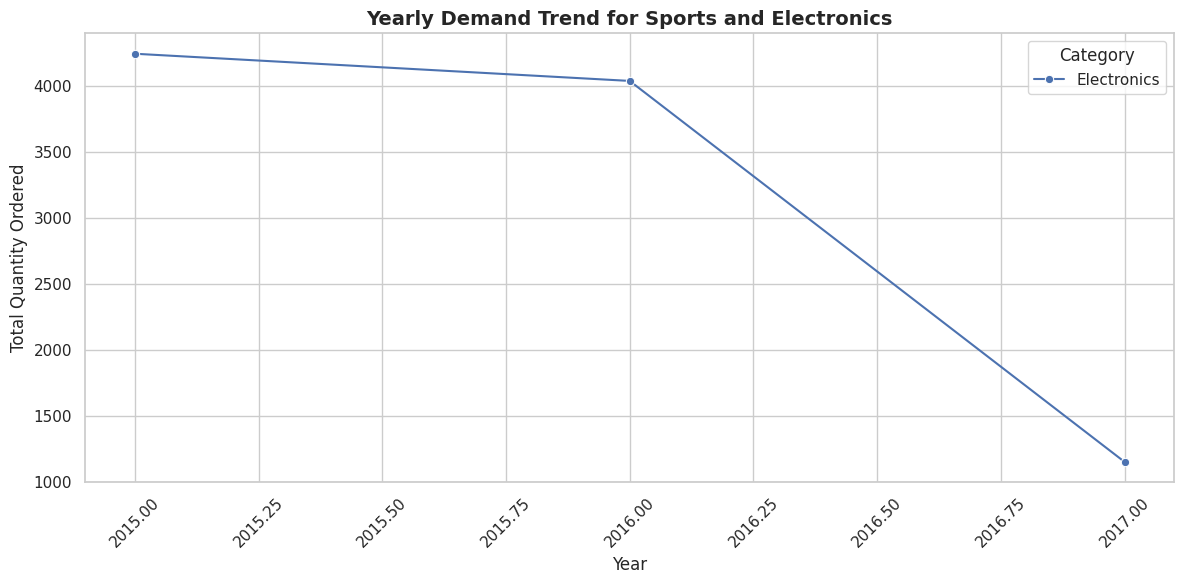

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# Step 0: Setup and Basic Checks
# ============================================

required_columns = [
    'Product Name', 'Order Item Quantity', 'Sales',
    'order date (DateOrders)', 'Market', 'Category Name'
]

for col in required_columns:
    if col not in df.columns:
        raise KeyError(f"Required column '{col}' not found in the DataFrame.")

# Convert 'order date (DateOrders)' to datetime
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
df = df.dropna(subset=['order date (DateOrders)'])  # Drop rows with invalid dates

# ============================================
# Step 1: Full Product Demand Calculation
# ============================================

# Aggregate total demand per product
product_demand = df.groupby('Product Name')['Order Item Quantity'].sum().reset_index()
product_demand.sort_values(by='Order Item Quantity', ascending=False, inplace=True)

# Save full product demand to CSV (all products)
product_demand.to_csv("All_Products_Demand.csv", index=False)

# ============================================
# Step 2: Identify Top and Least Demanded Products
# ============================================

top_10_products = product_demand.head(10)
least_10_products = product_demand.tail(10)

# Plot Top 10 Most Demanded Products
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_products, x='Order Item Quantity', y='Product Name', palette='Greens_r')
plt.title("Top 10 Most Demanded Products", fontsize=14, weight='bold')
plt.xlabel("Total Quantity Ordered", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.tight_layout()
plt.show()

# Plot 10 Least Demanded Products
plt.figure(figsize=(10,6))
sns.barplot(data=least_10_products, x='Order Item Quantity', y='Product Name', palette='Reds_r')
plt.title("10 Least Demanded Products", fontsize=14, weight='bold')
plt.xlabel("Total Quantity Ordered", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.tight_layout()
plt.show()

# ============================================
# Step 3: Market-wise Analysis for Sports and Electronics
# ============================================

categories_of_interest = ['Sports', 'Electronics']
filtered_df = df[df['Category Name'].isin(categories_of_interest)]

# Aggregate data by Market and Category
market_category = filtered_df.groupby(['Market', 'Category Name']).agg({
    'Order Item Quantity': 'sum',
    'Sales': 'sum'
}).reset_index()

# Plot Market-wise Demand for Sports and Electronics
plt.figure(figsize=(12,6))
sns.barplot(data=market_category, x='Market', y='Order Item Quantity', hue='Category Name', palette='Set2')
plt.title("Market-wise Demand for Sports and Electronics", fontsize=14, weight='bold')
plt.xlabel("Market", fontsize=12)
plt.ylabel("Total Quantity Ordered", fontsize=12)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

# Plot Market-wise Sales for Sports and Electronics
plt.figure(figsize=(12,6))
sns.barplot(data=market_category, x='Market', y='Sales', hue='Category Name', palette='Set1')
plt.title("Market-wise Sales for Sports and Electronics", fontsize=14, weight='bold')
plt.xlabel("Market", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

# ============================================
# Step 4: Time Series Analysis
# ============================================

# Extract monthly trends from 'order date (DateOrders)'
# If you have 'Month' and 'Year' columns in df, you can use them directly.
# But let's rely on the date column to create a YearMonth period.
df['YearMonth'] = df['order date (DateOrders)'].dt.to_period('M').dt.to_timestamp()

monthly_demand = df.groupby('YearMonth')['Order Item Quantity'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_demand, x='YearMonth', y='Order Item Quantity', marker='o', color='blue')
plt.title("Monthly Overall Demand Trend", fontsize=14, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Quantity Ordered", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly Trend for Sports and Electronics
monthly_cat_demand = filtered_df.groupby(['Month', 'Category Name'])['Order Item Quantity'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_cat_demand, x='Month', y='Order Item Quantity', hue='Category Name', marker='o')
plt.title("Monthly Demand Trend for Sports and Electronics", fontsize=14, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Quantity Ordered", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

# Yearly Trend for Sports and Electronics
monthly_cat_demand = filtered_df.groupby(['Year', 'Category Name'])['Order Item Quantity'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_cat_demand, x='Year', y='Order Item Quantity', hue='Category Name', marker='o')
plt.title("Yearly Demand Trend for Sports and Electronics", fontsize=14, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Quantity Ordered", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

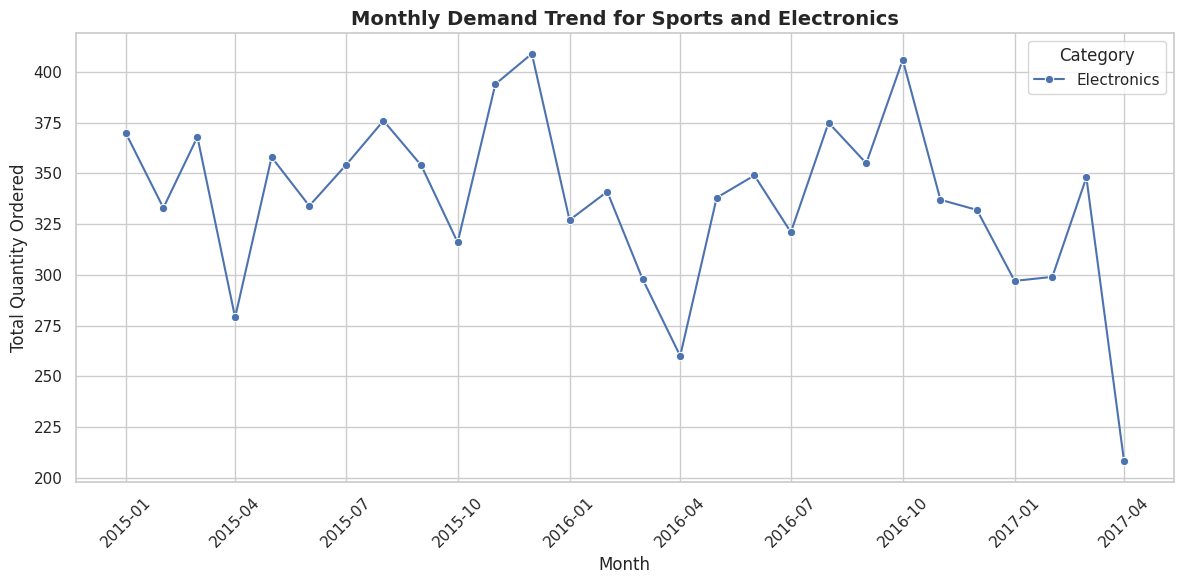

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Check required columns
required_columns = [
    'Product Name', 'Order Item Quantity', 'Sales',
    'order date (DateOrders)', 'Category Name'
]

for col in required_columns:
    if col not in df.columns:
        print("Available columns:", df.columns)
        raise KeyError(f"Required column '{col}' not found in the DataFrame.")

# Convert 'order date (DateOrders)' to datetime
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
df.dropna(subset=['order date (DateOrders)'], inplace=True)

# Create 'YearMonth' from 'order date (DateOrders)'
df['YearMonth'] = df['order date (DateOrders)'].dt.to_period('M').dt.to_timestamp()

# Aggregate product demand
product_demand = df.groupby('Product Name', as_index=False)['Order Item Quantity'].sum()
product_demand.sort_values(by='Order Item Quantity', ascending=False, inplace=True)

# Save all products demand
product_demand.to_csv("All_Products_Demand.csv", index=False)

# Define how many top and least products you want
top_n = 10
least_n = 10

top_demanded_products = product_demand.head(top_n)
least_demanded_products = product_demand.tail(least_n)

# Save most and least demanded products
top_demanded_products.to_csv("Most_Demanded_Products.csv", index=False)
least_demanded_products.to_csv("Least_Demanded_Products.csv", index=False)

# Download the CSV files (for Google Colab)
files.download("All_Products_Demand.csv")
files.download("Most_Demanded_Products.csv")
files.download("Least_Demanded_Products.csv")

# Filter for Sports and Electronics
categories_of_interest = ['Sports', 'Electronics']
filtered_df = df[df['Category Name'].isin(categories_of_interest)]

# Monthly demand for chosen categories
monthly_cat_demand = filtered_df.groupby(['YearMonth', 'Category Name'])['Order Item Quantity'].sum().reset_index()

# Plot monthly trend for Sports and Electronics
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_cat_demand, x='YearMonth', y='Order Item Quantity', hue='Category Name', marker='o')
plt.title("Monthly Demand Trend for Sports and Electronics", fontsize=14, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Quantity Ordered", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from google.colab import files

# Assume product_demand, top_demanded_products, and least_demanded_products DataFrames already exist

# Add a category column to each DataFrame
product_demand['Category'] = 'All'
top_demanded_products['Category'] = 'Most Demanded'
least_demanded_products['Category'] = 'Least Demanded'

# Concatenate all three DataFrames
combined_df = pd.concat([product_demand, top_demanded_products, least_demanded_products], ignore_index=True)

# Save the combined DataFrame to a single CSV file
combined_df.to_csv("Combined_Products_Demand.csv", index=False)

# Download the single CSV file
files.download("Combined_Products_Demand.csv")


<ipython-input-28-aaa4e165c6b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_demanded_products['Category'] = 'Most Demanded'
<ipython-input-28-aaa4e165c6b0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  least_demanded_products['Category'] = 'Least Demanded'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files

# Assume product_demand, top_demanded_products, least_demanded_products DataFrames already exist

# Add a category column
product_demand['Category'] = 'All'
top_demanded_products['Category'] = 'Most Demanded'
least_demanded_products['Category'] = 'Least Demanded'

# Concatenate all three DataFrames into one
combined_df = pd.concat([product_demand, top_demanded_products, least_demanded_products], ignore_index=True)

# Define a function to color the rows based on the Category
def highlight_category(row):
    if row['Category'] == 'All':
        return ['background-color: white'] * len(row)
    elif row['Category'] == 'Most Demanded':
        return ['background-color: lightgreen'] * len(row)
    elif row['Category'] == 'Least Demanded':
        return ['background-color: lightcoral'] * len(row)

# Apply the styling
styled_df = combined_df.style.apply(highlight_category, axis=1)

# Save the styled DataFrame as an Excel file (XLSX supports colors and formatting)
styled_df.to_excel("Styled_Combined_Products_Demand.xlsx", index=False)

# Download the Excel file
files.download("Styled_Combined_Products_Demand.xlsx")


<ipython-input-29-ed59d2b8d41c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_demanded_products['Category'] = 'Most Demanded'
<ipython-input-29-ed59d2b8d41c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  least_demanded_products['Category'] = 'Least Demanded'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

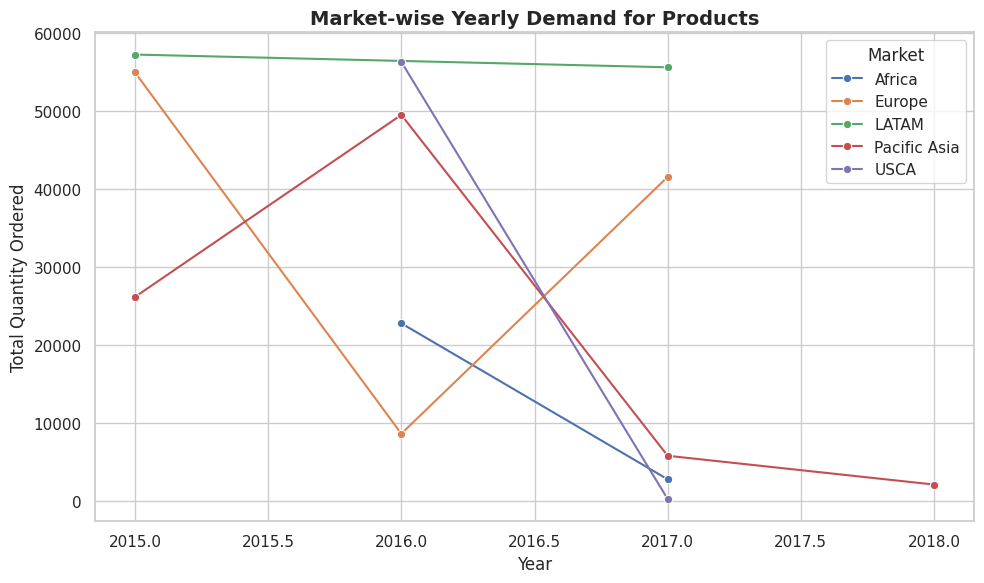

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert order date column to datetime if not already done
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')

# Extract the Year
df['Year'] = df['order date (DateOrders)'].dt.year

# Aggregate demand by Market and Year
market_year_demand = df.groupby(['Market', 'Year'], as_index=False)['Order Item Quantity'].sum()

# Plot the demand trend
plt.figure(figsize=(10,6))
sns.lineplot(data=market_year_demand, x='Year', y='Order Item Quantity', hue='Market', marker='o')
plt.title("Market-wise Yearly Demand for Products", fontsize=14, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Quantity Ordered", fontsize=12)
plt.grid(True)
plt.tight_layout(
plt.show()


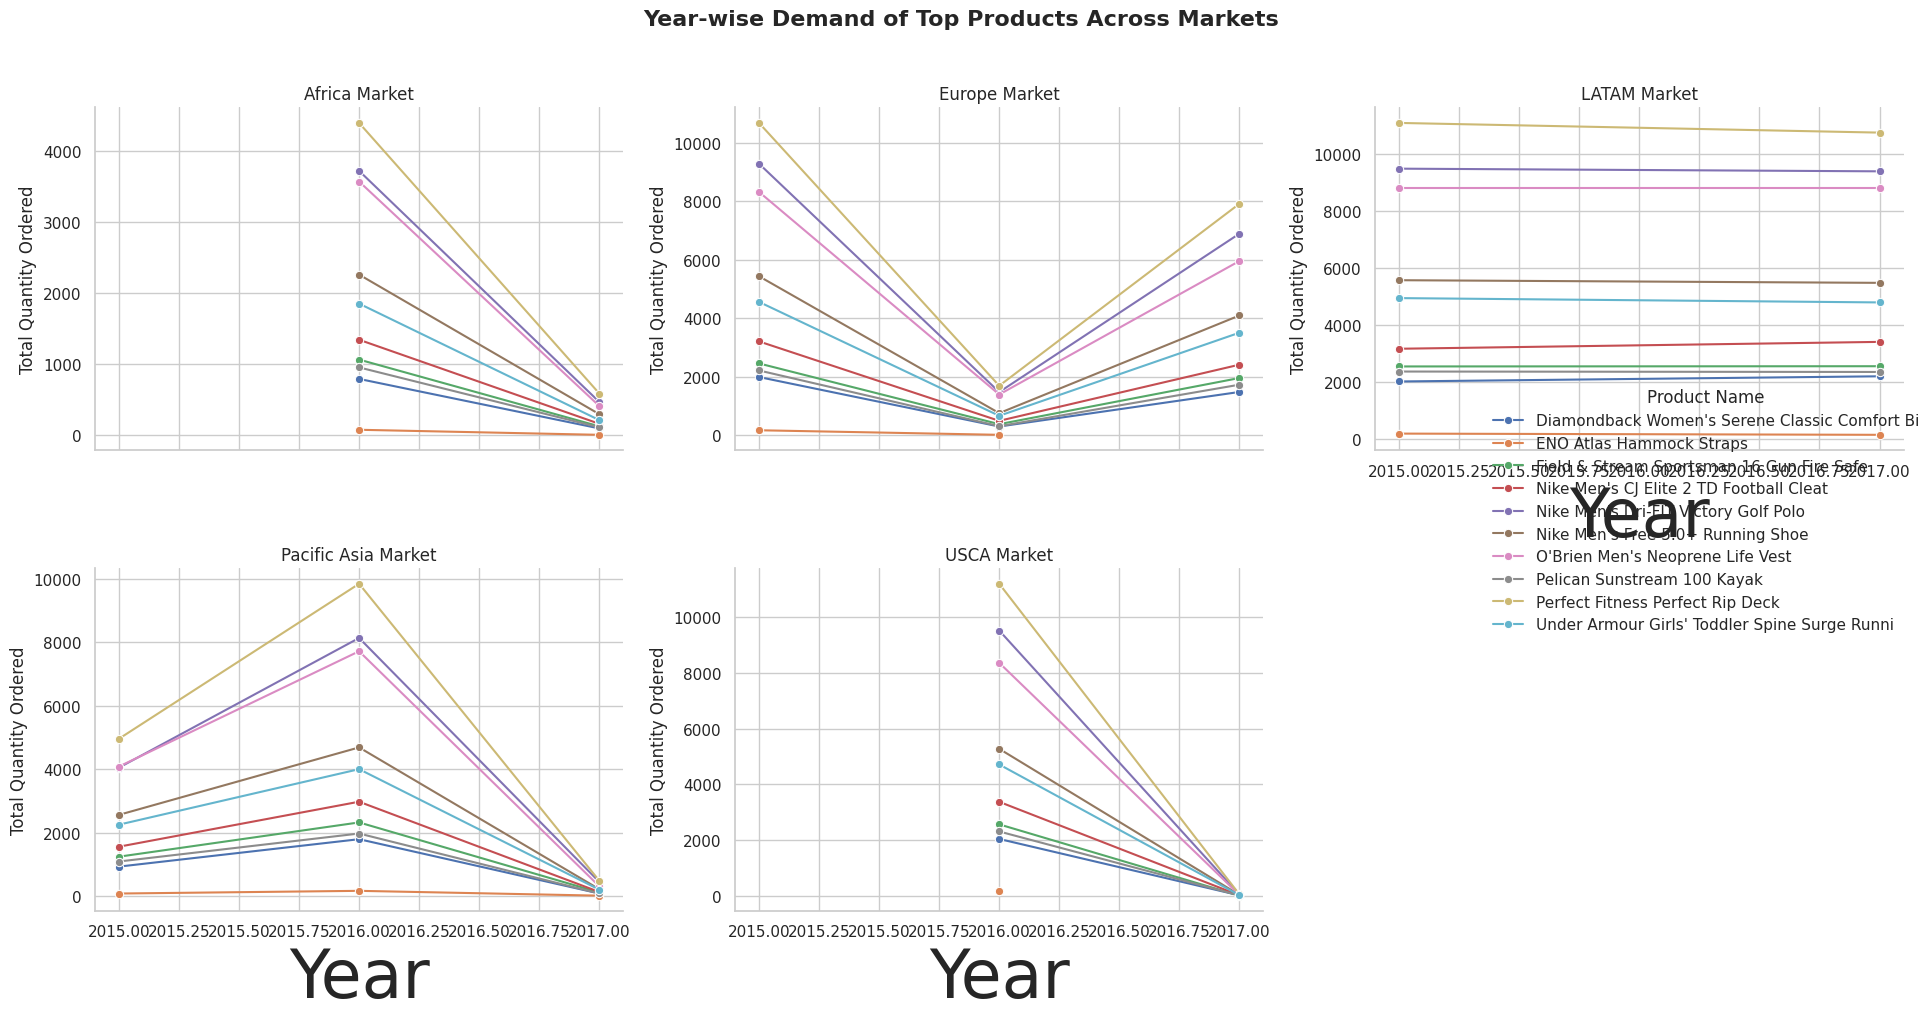

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the order date to datetime, if not already
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
df.dropna(subset=['order date (DateOrders)'], inplace=True)

# Extract the Year
df['Year'] = df['order date (DateOrders)'].dt.year

# Aggregate demand by Product, Market, and Year
product_market_year_demand = df.groupby(['Product Name', 'Market', 'Year'], as_index=False)['Order Item Quantity'].sum()

# Determine top N most demanded products across all markets and years
top_n = 10  # Adjust this number as needed
overall_demand = product_market_year_demand.groupby('Product Name', as_index=False)['Order Item Quantity'].sum()
overall_demand.sort_values(by='Order Item Quantity', ascending=False, inplace=True)
top_products = overall_demand.head(top_n)['Product Name'].unique()

# Filter data to include only top products
filtered_data = product_market_year_demand[product_market_year_demand['Product Name'].isin(top_products)]


# Plot year-wise demand for these top products, faceted by market
g = sns.FacetGrid(filtered_data, col='Market', hue='Product Name', col_wrap=3, height=5, sharey=False)
g.map_dataframe(sns.lineplot, x='Year', y='Order Item Quantity', marker='o')
g.add_legend(title='Product Name')
g.set_titles(col_template="{col_name} Market")

# Adjust the y-position of the main title
g.fig.suptitle("Year-wise Demand of Top Products Across Markets", y=1.02, fontsize=16, weight='bold')

for ax in g.axes:
    ax.set_xlabel("Year", fontsize=48)
    ax.set_ylabel("Total Quantity Ordered", fontsize=12)
    ax.grid(True)

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()


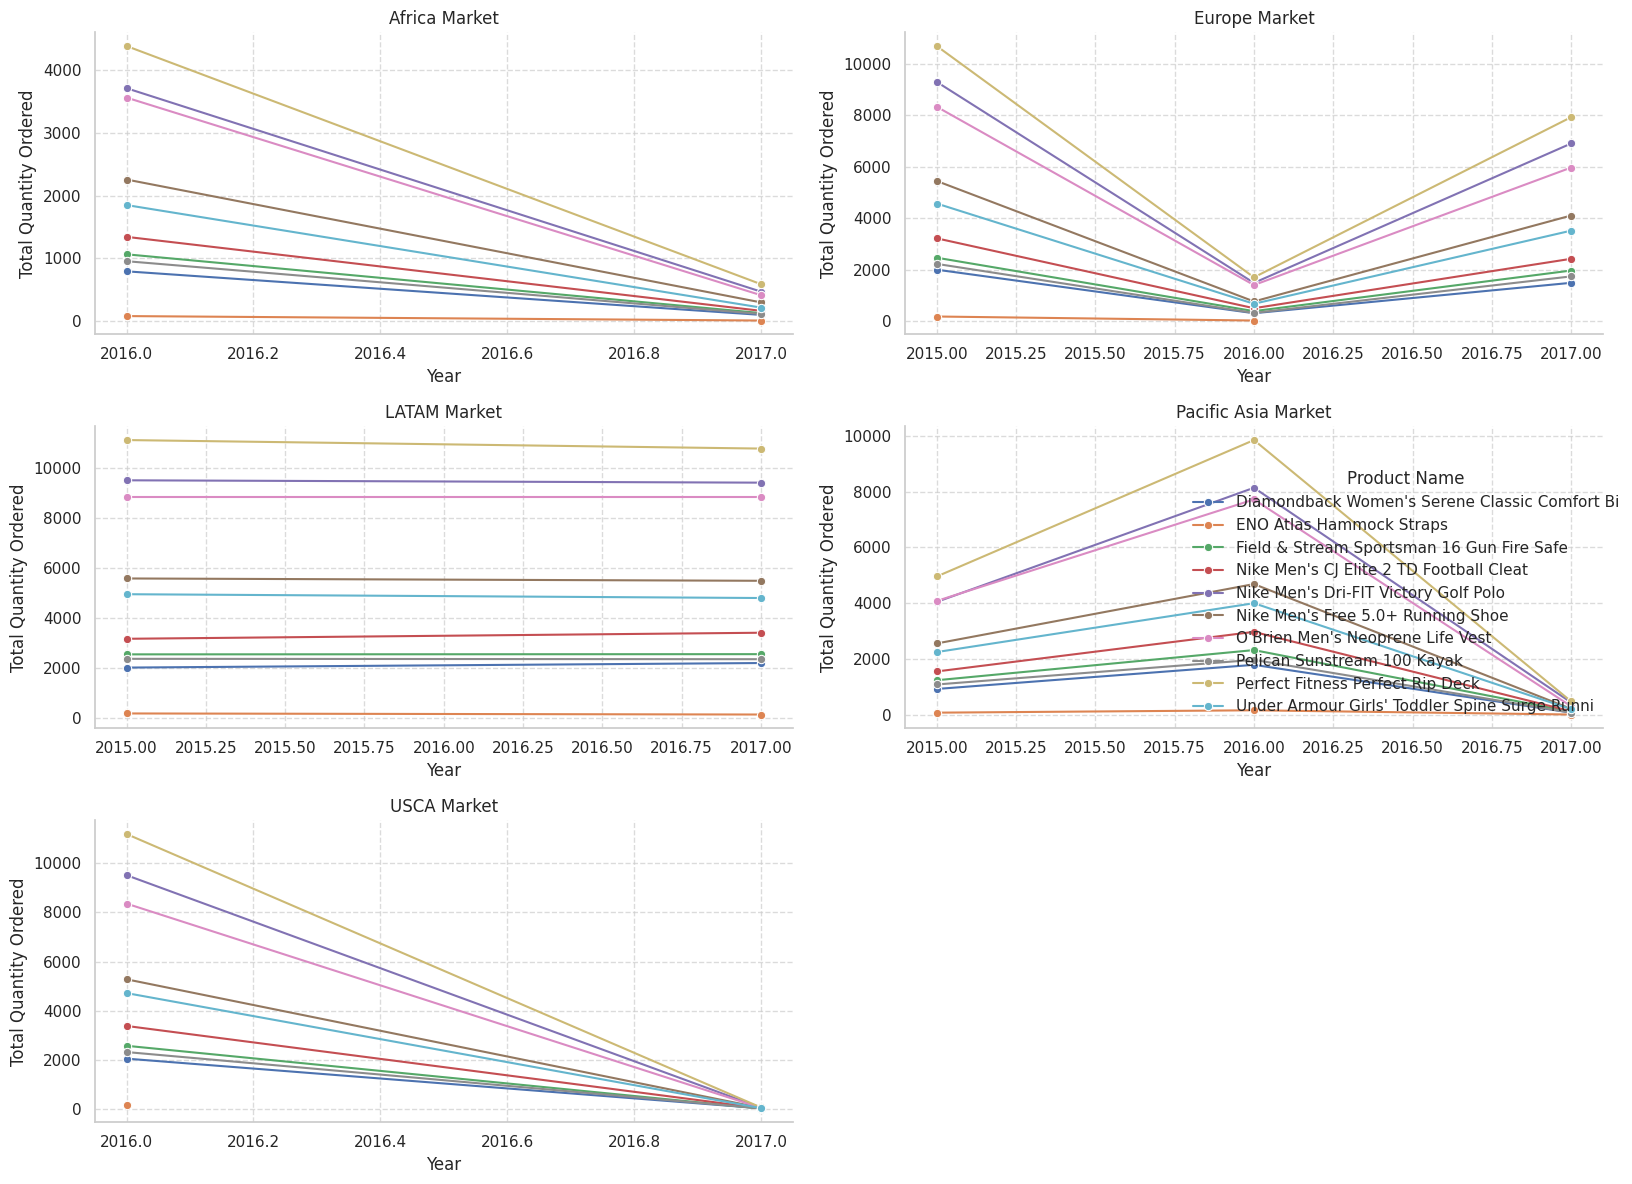

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df, Year extraction, and product selection have already been done
# The DataFrame 'filtered_data' should already contain only top products
# with columns: 'Product Name', 'Market', 'Year', 'Order Item Quantity'

# Example filtered_data structure (uncomment and adjust according to your environment):
# filtered_data = product_market_year_demand[product_market_year_demand['Product Name'].isin(top_products)]

# Create a FacetGrid for year-wise demand of top products across markets
g = sns.FacetGrid(filtered_data, col='Market', hue='Product Name',
                  col_wrap=2, height=4, aspect=1.5, sharex=False, sharey=False)

g.map_dataframe(sns.lineplot, x='Year', y='Order Item Quantity', marker='o')
g.add_legend(title='Product Name')

# Improve the appearance of each facet
for ax in g.axes:
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Total Quantity Ordered", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)

g.set_titles(col_template="{col_name} Market")

plt.tight_layout()
plt.show()


In [ ]:
# Plot year-wise demand for these top products, faceted by market
g = sns.FacetGrid(filtered_data, col='Market', hue='Product Name', col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='Year', y='Order Item Quantity', marker='o')
g.add_legend(title='Product Name')
g.set_titles(col_template="{col_name} Market")

# Adjust the y-position of the main title
g.fig.suptitle("Year-wise Demand of Top Products Across Markets", y=1.02, fontsize=16, weight='bold')

for ax in g.axes:
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Total Quantity Ordered", fontsize=12)
    ax.grid(True)

plt.tight_layout()
plt.show()
